In [1]:
!ls data

 stats.txt	  't=28.0.tar.gz'  't=52.0.tar.gz'  't=77.0.tar.gz'
 stats.txt.save   't=29.0.tar.gz'  't=53.0.tar.gz'  't=78.0.tar.gz'
't=0.0.tar'	  't=30.0.tar.gz'  't=54.0.tar.gz'  't=79.0.tar.gz'
't=0.0.tar.gz'	  't=3.0.tar.gz'   't=55.0.tar.gz'  't=80.0.tar.gz'
't=100.0.tar.gz'  't=31.0.tar.gz'  't=56.0.tar.gz'  't=8.0.tar.gz'
't=10.0.tar.gz'   't=32.0.tar.gz'  't=57.0.tar.gz'  't=81.0.tar.gz'
't=101.0.tar.gz'  't=33.0.tar.gz'  't=58.0.tar.gz'  't=82.0.tar.gz'
't=102.0.tar.gz'  't=34.0.tar.gz'  't=59.0.tar.gz'  't=83.0.tar.gz'
't=1.0.tar.gz'	  't=35.0.tar.gz'  't=60.0.tar.gz'  't=84.0.tar.gz'
't=11.0.tar.gz'   't=36.0.tar.gz'  't=6.0.tar.gz'   't=85.0.tar.gz'
't=12.0.tar.gz'   't=37.0.tar.gz'  't=61.0.tar.gz'  't=86.0.tar.gz'
't=13.0.tar.gz'   't=38.0.tar.gz'  't=62.0.tar.gz'  't=87.0.tar.gz'
't=14.0.tar.gz'   't=39.0.tar.gz'  't=63.0.tar.gz'  't=88.0.tar.gz'
't=15.0.tar.gz'   't=40.0.tar.gz'  't=64.0.tar.gz'  't=89.0.tar.gz'
't=16.0.tar.gz'   't=4.0.tar.gz'   't=65.0.tar.gz'  't=90.0.

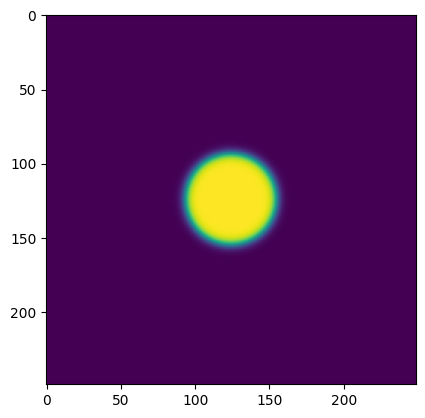

In [2]:
import fipy
import numpy as np
import matplotlib.pyplot as plt

aa = fipy.tools.dump.read('data/t=101.0.tar.gz')
aa
type(aa)
v = aa[0]
arr = v.value
arr_ = np.reshape(arr, (249, 249))
plt.imshow(arr_)

In [41]:
# viewer.plot()

/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/.ipynb_checkpoints
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/stats.txt
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/stats.txt.save
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=0.0.tar
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=0.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=1.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=2.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=3.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=4.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=5.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=6.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=7.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data/t=8.0.tar.gz
/users/aan2/Desktop/surf-2024-austyn-nguyen/bench

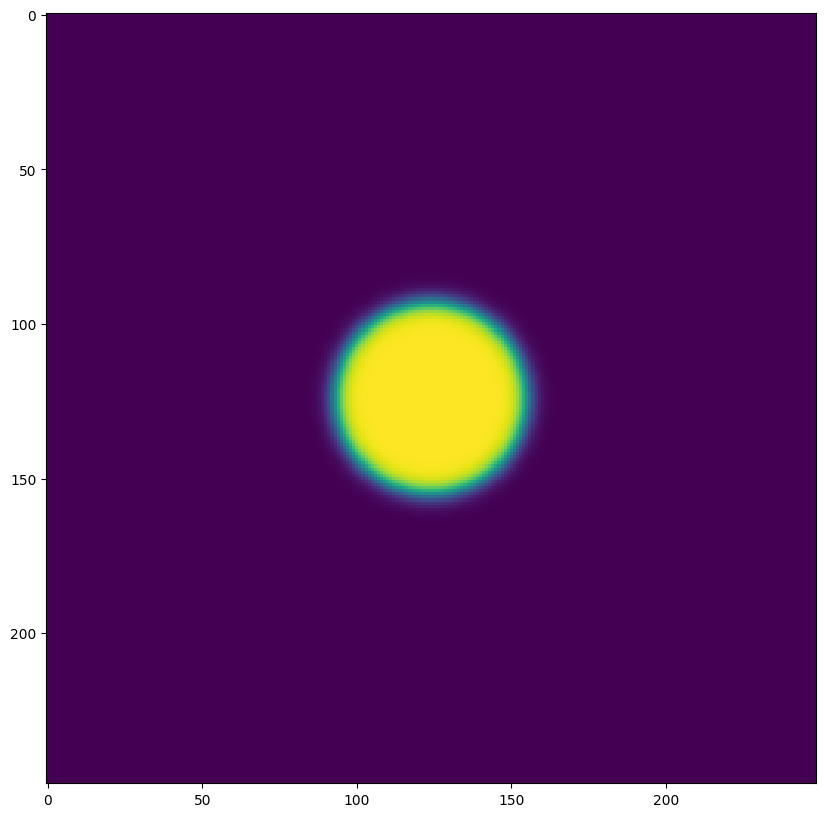

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path
import fipy
from natsort import natsorted

# Directory path where your data files are located
directory_path = Path('/users/aan2/Desktop/surf-2024-austyn-nguyen/benchmark8/data')

# List to store frames of your animation
animation_frames = []

# Get the list of files in the directory and sort them naturally
sorted_files = natsorted(directory_path.iterdir())

# Iterate through each file in the sorted directory
for file_path in sorted_files:
    print(file_path)
    if file_path.is_file() and file_path.name.startswith('t') and file_path.name.endswith('.gz'):
        # Load data from the file using fipy.tools.dump.read (assuming it returns aa as you mentioned)
        aa = fipy.tools.dump.read(str(file_path))  # Convert Path object to string
        
        # Extract the first item (assuming it contains your variable 'v')
        v = aa[0]
        
        # Assuming arr is your data reshaped to (249, 249)
        arr = np.reshape(v.value, (249, 249))
        
        # Append the frame to the animation frames list
        animation_frames.append(arr)

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(animation_frames[0], animated=True)

# Function to update the animation frames
def update(frame):
    im.set_array(frame)
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=animation_frames, interval=50, blit=True)

# Save the animation as an MP4 file
ani.save('animation.mp4', writer='ffmpeg', fps=20)

# plt.show()

In [10]:
# import yaml
 
# with open('params8a.yaml') as f:
#     dict = yaml.safe_load(f)
#     print(dict)

In [1]:
import os
import yaml
from rocrate.rocrate import ROCrate
from rocrate.model.contextentity import ContextEntity

# Create an empty ROCrate
crate = ROCrate()

# Add the YAML file to the crate
yaml_file_path = "params8a.yaml"
yaml_file = crate.add_file(yaml_file_path, properties={
    "name": "Parameter File",
    "encodingFormat": "text/yaml"
})

# Load the yaml file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)

# Loop through the YAML content and add it to the RO-Crate
for key, value in yaml_content.items():
    if value is not None:
        crate.add(ContextEntity(crate, identifier=f"#{key}", properties={
            "name": key,
            "value": value
        }))

# Write the crate metadata to a directory
crate.write("crate")

# Print the content of the RO-Crate metadata file
!cat crate/ro-crate-metadata.json

{
    "@context": "https://w3id.org/ro/crate/1.1/context",
    "@graph": [
        {
            "@id": "./",
            "@type": "Dataset",
            "datePublished": "2024-07-08T16:34:07+00:00",
            "hasPart": [
                {
                    "@id": "params8a.yaml"
                }
            ]
        },
        {
            "@id": "ro-crate-metadata.json",
            "@type": "CreativeWork",
            "about": {
                "@id": "./"
            },
            "conformsTo": {
                "@id": "https://w3id.org/ro/crate/1.1"
            }
        },
        {
            "@id": "params8a.yaml",
            "@type": "File",
            "encodingFormat": "text/yaml",
            "name": "Parameter File"
        },
        {
            "@id": "#Lx",
            "@type": "Thing",
            "name": "Lx",
            "value": 100.0
        },
        {
            "@id": "#Ly",
            "@type": "Thing",
            "name": "Ly",
            "valu